# Session 1 - Your "first" DataScience problem

In [1]:
# some imports

from IPython.core.display import display, HTML
from sklearn.neighbors import KNeighborsRegressor

display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

/tmp/ipykernel_17/337943651.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
## load data
train_set = pd.read_csv('/kaggle/input/ml-ub-2024-project-1/train_set.csv',index_col=0) 
test_set = pd.read_csv('/kaggle/input/ml-ub-2024-project-1/test_set.csv/test_set.csv',index_col=0) 


## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [3]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [4]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [5]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.

In [6]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [8]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

Type
h    3765
u    1191
t     476
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Type'>

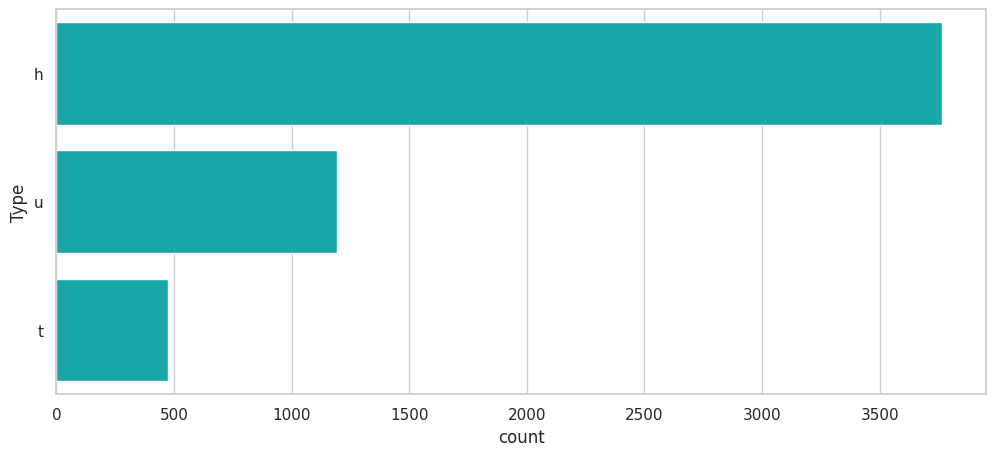

In [9]:
sns.countplot(y="Type", data=train_set, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


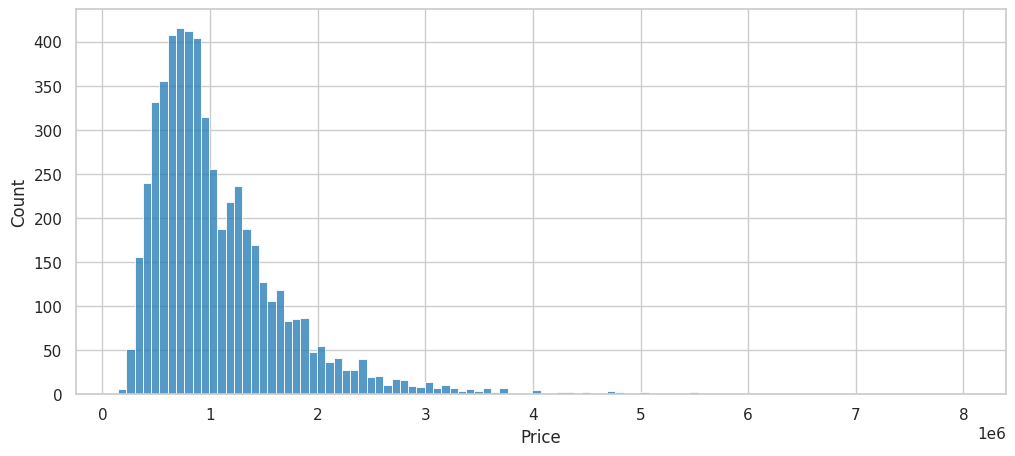

In [10]:
sns.histplot(train_set["Price"])
plt.show()

## BASELINE MODEL
### https://www.kaggle.com/t/b02bcc4763e14d0486715e7c8bc946fe

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

----- EVALUATION ON TRAIN SET ------
RMSE 398631.7157628393
R^2:  0.6203990805326086


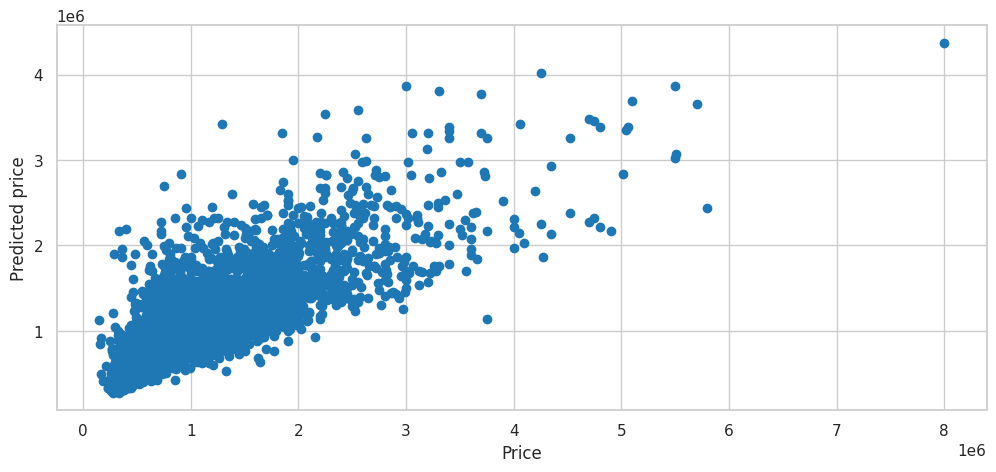

In [11]:
## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/baseline.csv',index=False)

## EXERCICE - TRAIN A MODEL and upload your best solution to the Kaggle Challenge

Tasks: 
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


## LAB 1 STARTS HERE
Author: David Blandón

Github: [@dacxjo](https://github.com/dacxjo)

## I. The problem

**Objective**: Predict house prices using certain features based on historical data.

**ML Problem Type**: Regression

**Evaluation Type**: $\text{RMSE}(y, \hat{y}) = \sqrt{\frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}}$

## II. Get the data

In [12]:
train_set = pd.read_csv('/kaggle/input/ml-ub-2024-project-1/train_set.csv',index_col=0) 
test_set = pd.read_csv('/kaggle/input/ml-ub-2024-project-1/test_set.csv/test_set.csv',index_col=0) 

## III. Exploratory Data Analysis

In [13]:
train_df = train_set.copy()
test_df = test_set.copy()

train_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitude   

In [15]:
train_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [16]:
train_df.query("Landsize == 0")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
11,Malvern East,2/25 Fisher St,3,t,1135000.0,S,Jellis,17/09/2016,11.2,3145.0,3.0,3.0,2.0,0.0,130.0,1988.0,Stonnington,-37.8812,145.0570,Southern Metropolitan,8801.0
22,Melbourne,3811/80 Abeckett St,2,u,450000.0,VB,MICM,7/11/2016,2.8,3000.0,2.0,1.0,1.0,0.0,55.0,2014.0,Melbourne,-37.8091,144.9609,Northern Metropolitan,17496.0
37,Preston,5 North St,3,h,815000.0,S,Love,15/10/2016,8.8,3072.0,3.0,1.0,1.0,0.0,NaN,NaN,Darebin,-37.7333,144.9844,Northern Metropolitan,14577.0
38,Elsternwick,5/29 Nepean Hwy,2,u,410000.0,VB,Gary,28/05/2016,8.5,3185.0,0.0,0.0,0.0,0.0,NaN,NaN,Glen Eira,-37.8863,144.9996,Southern Metropolitan,4898.0
42,Hawthorn East,16/799 Burwood Rd,2,u,444000.0,S,LITTLE,18/06/2016,7.5,3123.0,2.0,1.0,1.0,0.0,68.0,1970.0,Boroondara,-37.8245,145.0527,Southern Metropolitan,6482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,South Yarra,301/89 River St,2,u,930000.0,S,hockingstuart,3/09/2016,3.3,3141.0,2.0,2.0,2.0,0.0,NaN,2000.0,Stonnington,-37.8361,144.9966,Southern Metropolitan,14887.0
5420,Northcote,7 Prospect Gr,4,h,2100000.0,PI,Woodards,12/11/2016,5.5,3070.0,4.0,1.0,2.0,0.0,NaN,NaN,Darebin,-37.7736,145.0004,Northern Metropolitan,11364.0
5423,Thornbury,2/54 Pender St,1,u,365000.0,S,McGrath,10/12/2016,6.5,3071.0,1.0,1.0,1.0,0.0,40.0,1970.0,Darebin,-37.7544,145.0092,Northern Metropolitan,8870.0


In [17]:
train_df['Landsize'].replace(0, train_df['Landsize'].mean(), inplace=True)
test_df['Landsize'].replace(0, test_df['Landsize'].mean(), inplace=True)

/tmp/ipykernel_17/3241377041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Landsize'].replace(0, train_df['Landsize'].mean(), inplace=True)
/tmp/ipykernel_17/3241377041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [18]:
train_df['Postcode'] = pd.Categorical(train_df['Postcode'])
test_df['Postcode'] = pd.Categorical(test_df['Postcode'])

In [19]:
num_df = train_df.select_dtypes(include="number")
num_df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
index,,,,,,,,,,,,
0,4,1380000.0,7.5,4.0,2.0,2.0,766.0,NaN,NaN,-37.75595,144.90551,1543.0
1,2,1100000.0,5.5,2.0,1.0,1.0,189.0,NaN,NaN,-37.77670,144.99240,11364.0
2,3,1480000.0,9.2,3.0,1.0,4.0,605.0,116.0,1950.0,-37.79510,145.06960,7809.0
3,3,1055000.0,5.2,3.0,1.0,1.0,324.0,NaN,1930.0,-37.76530,144.95860,11918.0
4,4,1000000.0,13.8,4.0,3.0,2.0,728.0,164.0,1970.0,-37.76800,145.10270,5420.0


Text(0, 0.5, 'Price')

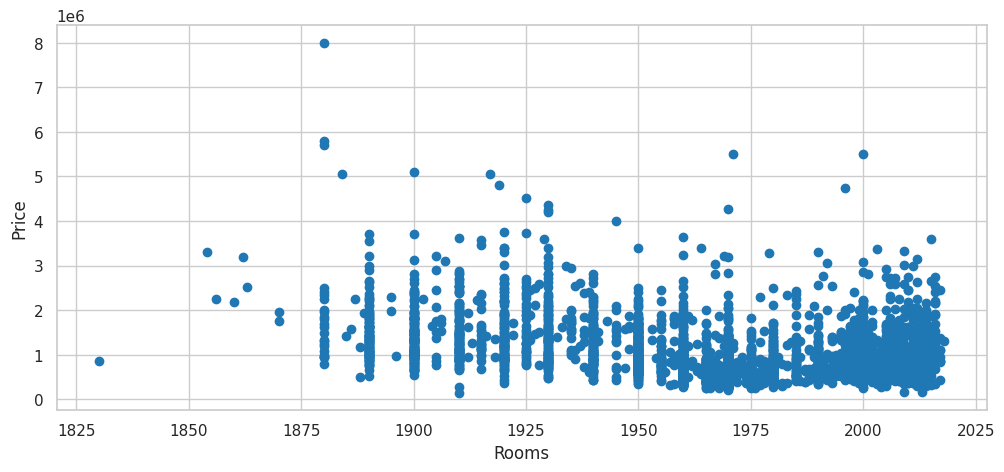

In [20]:
plt.scatter(train_df['YearBuilt'], train_df['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

In [21]:
train_df.query("YearBuilt < 1860")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
2872,Fitzroy,52 Nicholson St,4,h,3310000.0,S,Caine,13/08/2016,1.6,3065.0,4.0,4.0,2.0,337.0,291.0,1854.0,Yarra,-37.8052,144.9739,Northern Metropolitan,5825.0
4034,Collingwood,2/79 Oxford St,2,u,855000.0,S,Nelson,3/09/2016,1.6,3066.0,2.0,1.0,1.0,2886.0,122.0,1830.0,Yarra,-37.8042,144.9845,Northern Metropolitan,4553.0
4823,South Melbourne,352 Moray St,4,h,2260000.0,PI,Marshall,7/05/2016,2.1,3205.0,5.0,3.0,0.0,190.0,232.0,1856.0,Port Phillip,-37.8377,144.9653,Southern Metropolitan,5943.0


In [22]:
train_df.drop(index=626, inplace=True)
train_df.drop(index=4892, inplace=True)
train_df.drop(index=4742, inplace=True)
train_df.drop(index=4887, inplace=True)
train_df.drop(index=157, inplace=True)
train_df.drop(index=565, inplace=True)
train_df.drop(index=2879, inplace=True)
train_df.drop(index=3327, inplace=True)
train_df.drop(index=2324, inplace=True)
train_df.drop(index=2521, inplace=True)
train_df.drop(index=2729, inplace=True)
train_df.drop(index=1743, inplace=True)
train_df.drop(index=4243, inplace=True)
train_df.drop(index=5264, inplace=True)
train_df.drop(index=2176, inplace=True)
train_df.drop(index=3822, inplace=True)
train_df.drop(index=477, inplace=True)
train_df.drop(index=4978, inplace=True)

<Axes: >

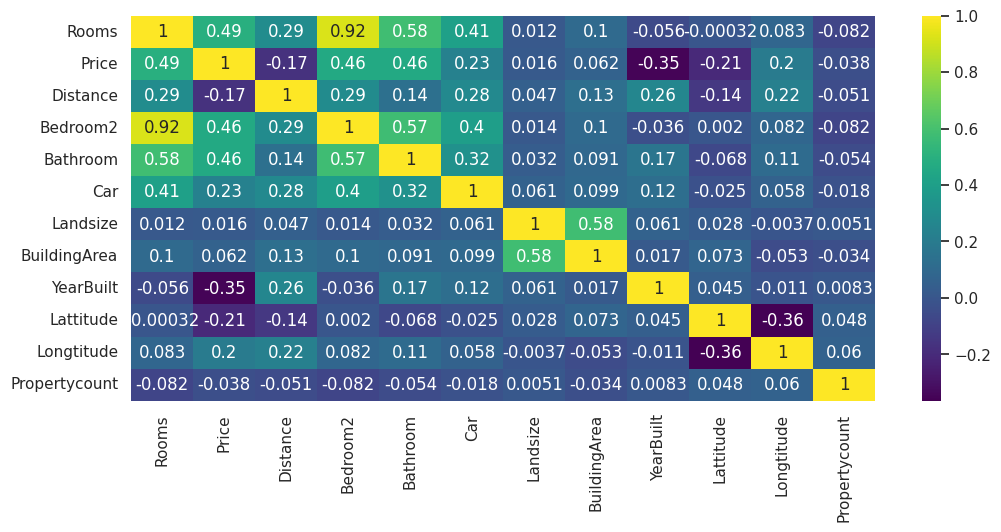

In [23]:
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap="viridis")

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>]], dtype=object)

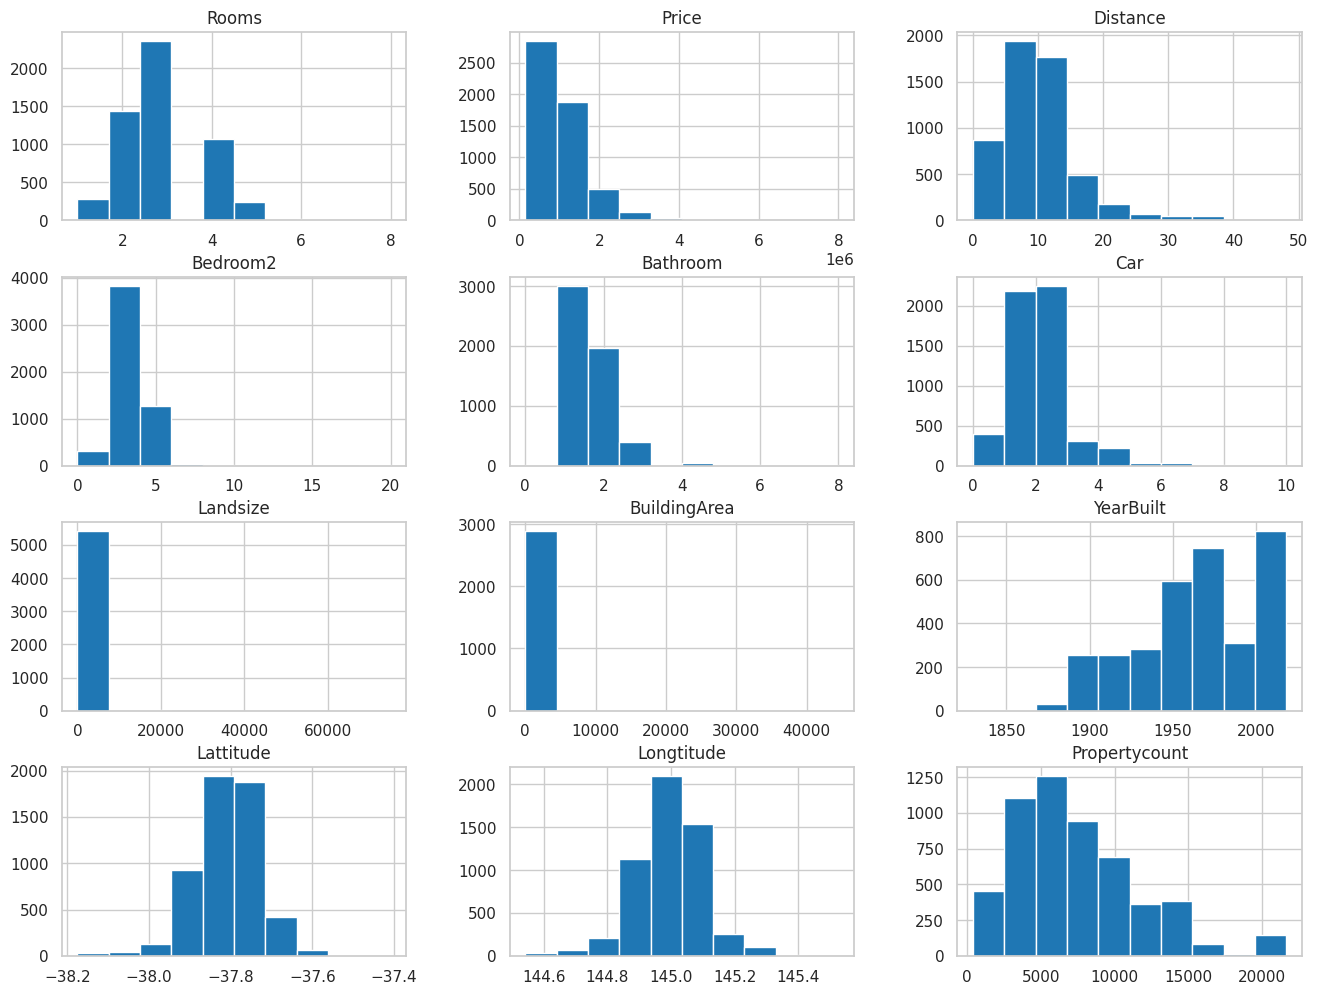

In [24]:
num_df.hist(figsize=(16,12))

In [25]:
cat_df = train_df.select_dtypes(include="object")
cat_df

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan
...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,h,S,Nelson,22/08/2016,Darebin,Northern Metropolitan
5428,Fitzroy North,134 Clauscen St,h,S,Nelson,26/08/2017,NaN,Northern Metropolitan
5429,Richmond,23a Dickmann St,t,PI,Jellis,22/08/2016,Yarra,Northern Metropolitan


In [26]:
train_df['Sale year'] = pd.to_datetime(train_df['Date'], format="%d/%m/%Y").dt.year 
train_df['Sale month'] = pd.to_datetime(train_df['Date'],format="%d/%m/%Y").dt.month
train_df['Sale day'] = pd.to_datetime(train_df['Date'], format="%d/%m/%Y").dt.day

test_df['Sale year'] = pd.to_datetime(test_df['Date'],format="%d/%m/%Y").dt.year
test_df['Sale month'] = pd.to_datetime(test_df['Date'],format="%d/%m/%Y").dt.month
test_df['Sale day'] = pd.to_datetime(test_df['Date'],format="%d/%m/%Y").dt.day

In [27]:
train_df['total_rooms'] = train_df['Rooms']  + train_df['Bedroom2'] 
test_df['total_rooms'] = test_df['Rooms']  + test_df['Bedroom2'] 

In [28]:
train_df['Building_Age'] = 2024 - train_df['YearBuilt']
test_df['Building_Age'] = 2024 - test_df['YearBuilt']

<Axes: >

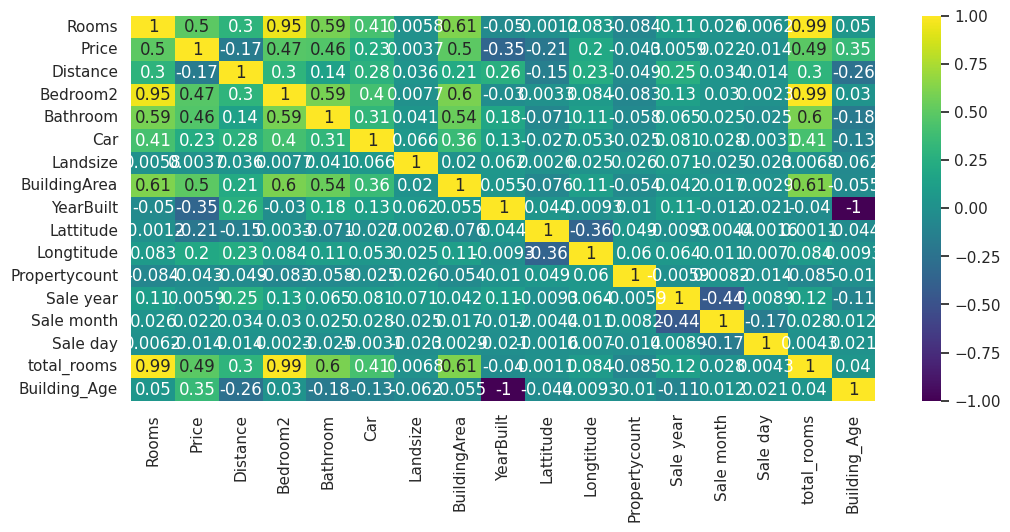

In [29]:
corr = train_df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="viridis")

In [30]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

# 'Car', 'Distance', 'Building_Age', 'Propertycount', 'Lattitude', 'Longtitude', 'Bathroom', 'BuildingArea'
num_features = ['total_rooms', 'Bathroom', 'Car', 'Building_Age', 'Propertycount', 'Lattitude', 'Longtitude', 'Distance', 'BuildingArea']
cat_features = ['Type', 'SellerG', 'Suburb', 'CouncilArea', 'Regionname']
features = num_features + cat_features

X = train_df[features]
y = train_df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
         (
            "imputation_constant",
            SimpleImputer(fill_value="Unavailable", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("numerical", numeric_preprocessor, num_features),
        ("categorical", categorical_preprocessor, cat_features),
    ]
)

pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("regressor", neighbors.KNeighborsRegressor())]
)

set_config(display="diagram")
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_rooms', 'Bathroom',
                                                   'Car', 'Building_Age',
                                                   'Propertycount', 'Lattitude',
                                                   'Longtitude', 'Distance',
                                                   'BuildingArea']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='Unavailable',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'SellerG', 'Suburb',
                                                   'CouncilArea',
                                                   'Regionname'])])),
                ('regressor', KNeighborsRegressor())])

In [31]:
param_grid = {
    'regressor__n_neighbors': range(1, 15),
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'regressor__n_neighbors': 6}
0.7004424765910713
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_rooms', 'Bathroom',
                                                   'Car', 'Building_Age',
                                                   'Propertycount', 'Lattitude',
                                                   'Longtitude', 'Distance',
                                                   'BuildingArea']),
                                                 ('categorical',
                                                  Pipeline

----- EVALUATION ON TRAIN SET ------
RMSE 286827.7997190152
R^2:  0.7936749719138432


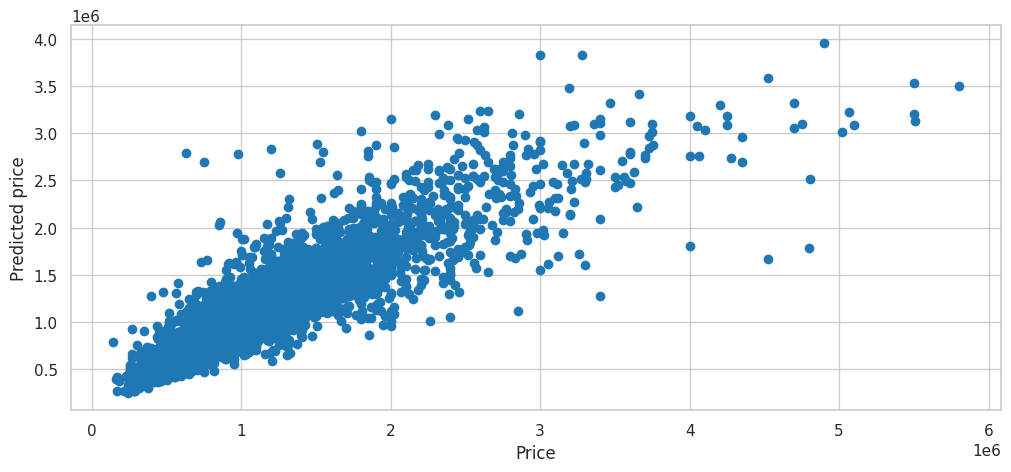

In [32]:

X = train_df[features]
y = train_df[['Price']]

model = grid_search.best_estimator_

model.fit(X, y)

y_pred = model.predict(X)


## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price')
plt.show()

## predict the test set and generate the submission file
X_test = test_df[features]
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/submission.csv',index=False)


In [33]:
## the features

## the model

## fit the model

## predict training set

## Evaluate the model and plot it

## predict the test set and generate the submission file

Explain the choosed model and why you think that is is the best

In [34]:
## %%bash
## kaggle competitions submit -c ml-ub-2024-project-1 -f ./output/session1/submission.csv -m "Just KNRegressor"